In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Define the folder path inside your Drive
# Adjust "My Drive" if you put the folder in a subdirectory
folder = "/content/drive/My Drive/derived-era5-land-daily-statistics"

# Step 3: Load the temperature files explicitly
import xarray as xr

temp_files = [
    f"{folder}/2020_2m_temperature_daily_maximum.nc",
    f"{folder}/2022_2m_temperature_daily_maximum.nc",
    f"{folder}/2023_2m_temperature_daily_maximum.nc",
    f"{folder}/2024_2m_temperature_daily_maximum.nc",
    f"{folder}/2025_2m_temperature_daily_maximum.nc"
]

ds = xr.open_mfdataset(temp_files, combine="by_coords")
ds

Mounted at /content/drive


<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 1733, latitude: 350, longitude: 660)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 14kB 2020-01-01 ... 2025-09-28
  * latitude    (latitude) float64 3kB 69.9 69.8 69.7 69.6 ... 35.2 35.1 35.0
  * longitude   (longitude) float64 5kB -25.0 -24.9 -24.8 ... 40.7 40.8 40.9
    number      int64 8B 0
Data variables:
    t2m         (valid_time, latitude, longitude) float32 2GB dask.array<chunksize=(23, 22, 42), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-03T16:43 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
!pip3 install netcdf4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.9 MB/s eta 0:00:00


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

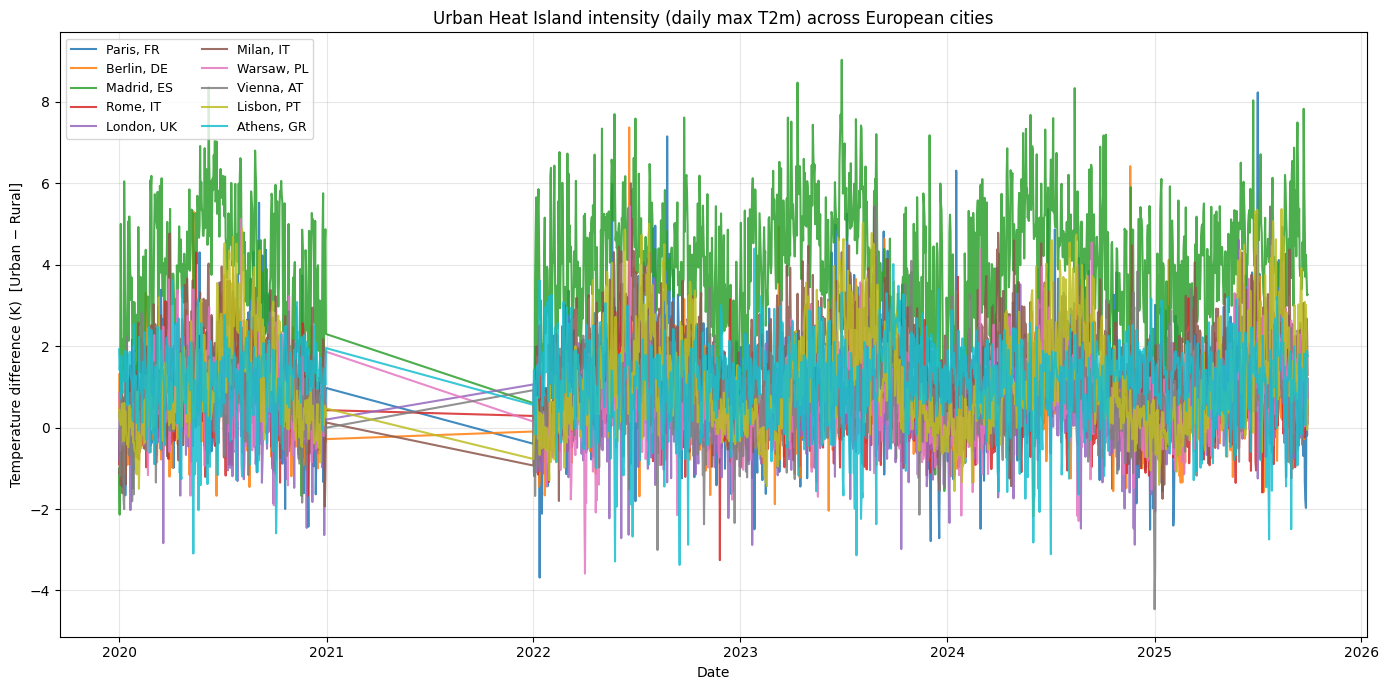

In [ ]:
folder = "/content/drive/My Drive/derived-era5-land-daily-statistics"

# Step 3: Load the temperature files explicitly
import xarray as xr

temp_files = [
    f"{folder}/2020_2m_temperature_daily_maximum.nc",
    f"{folder}/2022_2m_temperature_daily_maximum.nc",
    f"{folder}/2023_2m_temperature_daily_maximum.nc",
    f"{folder}/2024_2m_temperature_daily_maximum.nc",
    f"{folder}/2025_2m_temperature_daily_maximum.nc"
]

ds = xr.open_mfdataset(temp_files, combine="by_coords")
ds

# -------------------------------------------------------------------------
# Ten urban–rural pairs across Europe
# Coordinates are approximate (lat, lon).
# -------------------------------------------------------------------------
urban_coords = {
    "Paris, FR": (48.8566, 2.3522),
    "Berlin, DE": (52.5200, 13.4050),
    "Madrid, ES": (40.4168, -3.7038),
    "Rome, IT": (41.9028, 12.4964),
    "London, UK": (51.5074, -0.1278),
    "Milan, IT": (45.4642, 9.1900),
    "Warsaw, PL": (52.2297, 21.0122),
    "Vienna, AT": (48.2082, 16.3738),
    "Lisbon, PT": (38.7223, -9.1393),
    "Athens, GR": (37.9838, 23.7275),
}

rural_coords = {
    "Rural near Paris": (49.3000, 1.0000),
    "Rural near Berlin": (52.9000, 12.5000),
    "Rural near Madrid": (40.8000, -4.3000),
    "Rural near Rome": (42.3000, 11.8000),
    "Rural near London": (51.0000, 0.5000),
    "Rural near Milan": (45.8000, 8.8000),
    "Rural near Warsaw": (52.6000, 20.0000),
    "Rural near Vienna": (48.5000, 15.8000),
    "Rural near Lisbon": (39.1000, -9.3000),
    "Rural near Athens": (38.3000, 23.3000),
}

# -------------------------------------------------------------------------
# Helper to extract nearest grid point time series
# -------------------------------------------------------------------------
def extract_temp(ds, lat, lon):
    lons = ds.longitude
    target_lon = lon
    if lons.max() > 180:  # dataset uses 0..360
        target_lon = (lon + 360) % 360
    lat_idx = np.abs(ds.latitude - lat).argmin().item()
    lon_idx = np.abs(lons - target_lon).argmin().item()
    return ds.t2m[:, lat_idx, lon_idx]

# -------------------------------------------------------------------------
# Build UHI time series for each urban–rural pair
# -------------------------------------------------------------------------
uhi_series = {}
for (u_name, u_coords), (r_name, r_coords) in zip(urban_coords.items(), rural_coords.items()):
    u_ts = extract_temp(ds, *u_coords)
    r_ts = extract_temp(ds, *r_coords)
    uhi_series[u_name] = (u_ts - r_ts)

# -------------------------------------------------------------------------
# Plot UHI intensity over time
# -------------------------------------------------------------------------
plt.figure(figsize=(14, 7))
for city, series in uhi_series.items():
    plt.plot(ds.valid_time, series, label=city, alpha=0.85)

plt.title("Urban Heat Island intensity (daily max T2m) across European cities")
plt.xlabel("Date")
plt.ylabel("Temperature difference (K)  [Urban − Rural]")
plt.legend(ncol=2, fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
!pip3 install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.2 MB/s eta 0:00:00


In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

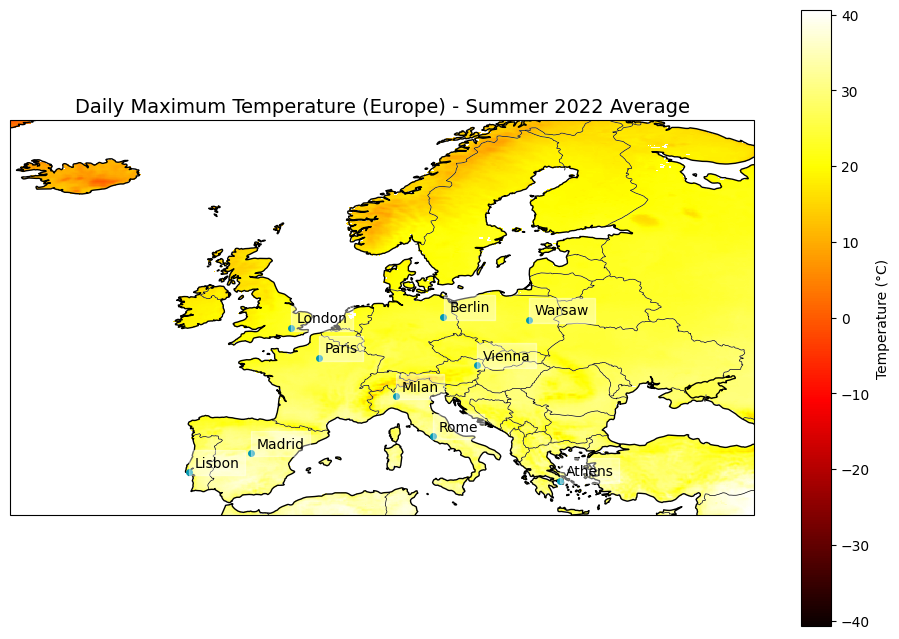

In [ ]:
## loading dataset
folder = "/content/drive/My Drive/derived-era5-land-daily-statistics"

temp_files = [
    f"{folder}/2020_2m_temperature_daily_maximum.nc",
    f"{folder}/2022_2m_temperature_daily_maximum.nc",
    f"{folder}/2023_2m_temperature_daily_maximum.nc",
    f"{folder}/2024_2m_temperature_daily_maximum.nc",
    f"{folder}/2025_2m_temperature_daily_maximum.nc"
]

ds = xr.open_mfdataset(temp_files, combine="by_coords")

##Summer Seasonal Average 2022
summer = ds.sel(valid_time=slice("2022-06-01", "2022-08-31")).mean(dim="valid_time")

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='white')
ax.set_title("Summer Seasonal Daily Maximum Temperature 2022 (Europe)", fontsize=14, font='sans')

# Plot daily max temperature in Celsius
# day.t2m - 273.15 # This line seems to be a leftover from previous iterations. The variable `day` is not defined.
(summer.t2m - 273.15).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="hot",
    cbar_kwargs={"label": "Temperature (°C)"}
)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_title("Daily Maximum Temperature (Europe) - Summer 2022 Average", fontsize=14)

cities = {
    "Paris": (48.8566, 2.3522),
    "Berlin": (52.5200, 13.4050),
    "Madrid": (40.4168, -3.7038),
    "Rome": (41.9028, 12.4964),
    "London": (51.5074, -0.1278),
    "Milan": (45.4642, 9.1900),
    "Warsaw": (52.2297, 21.0122),
    "Vienna": (48.2082, 16.3738),
    "Lisbon": (38.7223, -9.1393),
    "Athens": (37.9838, 23.7275),
}

for name, (lat, lon) in cities.items():
    plt.text(lon+0.5, lat+0.5, name, transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.4, edgecolor='white'))
    plt.plot(lon, lat, marker="o", color="#0097b2", markersize=4, transform=ccrs.PlateCarree())
plt.show()

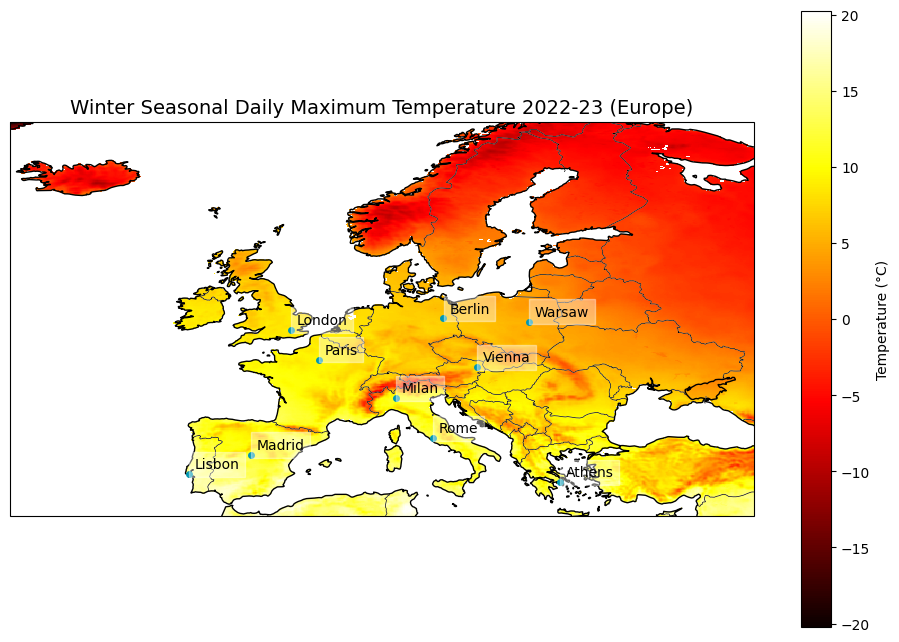

In [ ]:
## loading dataset
folder = "/content/drive/My Drive/derived-era5-land-daily-statistics"

temp_files = [
    f"{folder}/2020_2m_temperature_daily_maximum.nc",
    f"{folder}/2022_2m_temperature_daily_maximum.nc",
    f"{folder}/2023_2m_temperature_daily_maximum.nc",
    f"{folder}/2024_2m_temperature_daily_maximum.nc",
    f"{folder}/2025_2m_temperature_daily_maximum.nc"
]

ds = xr.open_mfdataset(temp_files, combine="by_coords")

##Winter Seasonal Average 2022-3
summer = ds.sel(valid_time=slice("2022-12-21", "2023-03-20")).mean(dim="valid_time")

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='white')
ax.set_title("Winter Seasonal Daily Maximum Temperature 2022-23 (Europe)", fontsize=14, font='sans')

# Plot daily max temperature in Celsius
# day.t2m - 273.15 # This line seems to be a leftover from previous iterations. The variable `day` is not defined.
(summer.t2m - 273.15).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="hot",
    cbar_kwargs={"label": "Temperature (°C)"}
)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_title("Winter Seasonal Daily Maximum Temperature 2022-23 (Europe)", fontsize=14)

cities = {
    "Paris": (48.8566, 2.3522),
    "Berlin": (52.5200, 13.4050),
    "Madrid": (40.4168, -3.7038),
    "Rome": (41.9028, 12.4964),
    "London": (51.5074, -0.1278),
    "Milan": (45.4642, 9.1900),
    "Warsaw": (52.2297, 21.0122),
    "Vienna": (48.2082, 16.3738),
    "Lisbon": (38.7223, -9.1393),
    "Athens": (37.9838, 23.7275),
}

for name, (lat, lon) in cities.items():
    plt.text(lon+0.5, lat+0.5, name, transform=ccrs.PlateCarree(), bbox=dict(facecolor='white', alpha=0.4, edgecolor='white'))
    plt.plot(lon, lat, marker="o", color="#0097b2", markersize=4, transform=ccrs.PlateCarree())
plt.show()